<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/MachineLearningPractice_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from scipy.stats import loguniform
from scipy.stats import uniform

In [ ]:
data , y = fetch_california_housing(as_frame = True , return_X_y = True)
dataset = fetch_california_housing(as_frame = True)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
dataset.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
dataset.frame # entire dataset including target var

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
dataset.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline 

In [ ]:
np.random.seed(306)


In [ ]:
cv = ShuffleSplit(n_splits = 10 , test_size = 0.2, random_state = 42)

In [ ]:
# we will split the data into train and test 
# we will split the train data into train and data for hypertunning (validation data)

In [ ]:
features, labels = fetch_california_housing(as_frame = True, return_X_y = True)

com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels , random_state = 42)

train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state = 42)

In [ ]:
# linear regression with normal eqn

lin_reg_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
    ("linear_regressor" , LinearRegression())
])

lin_reg_cv_results = cross_validate(lin_reg_pipeline, 
                                    com_train_features,
                                    com_train_labels,
                                    cv = cv,
                                    scoring = "neg_mean_absolute_error",
                                    return_train_score = True, 
                                    return_estimator = True)

lin_reg_train_error = -1 * lin_reg_cv_results["train_score"]
lin_reg_test_error = -1 * lin_reg_cv_results["test_score"]

print("mean absolute train error" , lin_reg_train_error)

print("mean absolute train error mean is {} and std is {}" .format(lin_reg_train_error.mean() ,lin_reg_train_error.std()) )

print("mean absolute test error" , lin_reg_test_error)

print("mean absolute test error mean is {} and std is {}" .format(lin_reg_test_error.mean() ,lin_reg_test_error.std()) )


mean absolute train error [0.53432327 0.52950337 0.52972591 0.53233173 0.52827875 0.53088043
 0.52799365 0.53377084 0.5269963  0.53021738]
mean absolute train error mean is 0.5304021630418913 and std is 0.0023212935286191015
mean absolute test error [0.51461906 0.52859333 0.53008718 0.51739076 0.53320319 0.53014581
 0.53485988 0.51595501 0.53773993 0.52754819]
mean absolute test error mean is 0.5270142316974493 and std is 0.007781288307852414


In [ ]:
# both the errors are close but are not low which shows underfitting

In [ ]:
# linear regression with SGD

sgd_reg_pipeline = Pipeline([
    ("scaler" , StandardScaler()),
    ("sgd_regressor" , SGDRegressor(
        max_iter = np.ceil(1e6/com_train_features.shape[0]), # max_iter = one million / no. of rows
        early_stopping = True,
        eta0 = 1e-4,
        learning_rate = "constant",
        tol = 1e-5,
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        average = 10,
        random_state = 42 ))])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline, 
                                    com_train_features,
                                    com_train_labels,
                                    cv = cv,
                                    scoring = "neg_mean_absolute_error",
                                    return_train_score = True, 
                                    return_estimator = True)

sgd_reg_train_error = -1 * sgd_reg_cv_results["train_score"]
sgd_reg_test_error = -1 * sgd_reg_cv_results["test_score"]


print("mean absolute train error mean is {} and std is {}" .format(sgd_reg_train_error.mean() ,sgd_reg_train_error.std()) )


print("mean absolute test error mean is {} and std is {}" .format(sgd_reg_test_error.mean() ,sgd_reg_test_error.std()) )



mean absolute train error mean is 0.5640399853222634 and std is 0.02266704205287487
mean absolute test error mean is 0.5607392935103552 and std is 0.025296964206753057


In [ ]:
# polynomial regression

poly_reg_pipeline = Pipeline([
    ("poly" , PolynomialFeatures(degree = 2)),
    ("scaler" , StandardScaler()),
    ("linear_regressor" , LinearRegression())
])

poly_reg_cv_results = cross_validate(
    poly_reg_pipeline,
    com_train_features,
    com_train_labels,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    return_train_score = True,
    return_estimator= True
)



poly_reg_train_error = -1 * poly_reg_cv_results["train_score"]
poly_reg_test_error = -1 * poly_reg_cv_results["test_score"]


print("mean absolute train error mean is {} and std is {}" .format(poly_reg_train_error.mean() ,poly_reg_train_error.std()) )


print("mean absolute test error mean is {} and std is {}" .format(poly_reg_test_error.mean() ,poly_reg_test_error.std()) )



mean absolute train error mean is 0.4609643523643526 and std is 0.002977081038774092
mean absolute test error mean is 0.4854459947853937 and std is 0.030312417310763985


In [ ]:
# using interaction_only = True
poly_reg_pipeline = Pipeline([
    ("poly" , PolynomialFeatures(degree = 2 , interaction_only = True)),
    ("scaler" , StandardScaler()),
    ("linear_regressor" , LinearRegression())
])

poly_reg_cv_results = cross_validate(
    poly_reg_pipeline,
    com_train_features,
    com_train_labels,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    return_train_score = True,
    return_estimator= True
)



poly_reg_train_error = -1 * poly_reg_cv_results["train_score"]
poly_reg_test_error = -1 * poly_reg_cv_results["test_score"]


print("mean absolute train error mean is {} and std is {}" .format(poly_reg_train_error.mean() ,poly_reg_train_error.std()) )


print("mean absolute test error mean is {} and std is {}" .format(poly_reg_test_error.mean() ,poly_reg_test_error.std()) )



mean absolute train error mean is 0.47781943309758984 and std is 0.0028201945045987498
mean absolute test error mean is 0.4968715693459049 and std is 0.024386511812476478


In [ ]:
# figuring out best degree value using validation_curve. This is manual hyperparameter tuning

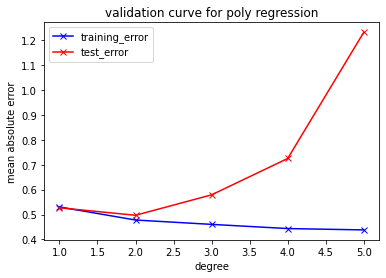

In [ ]:
degree = [1,2,3,4,5]
train_scores , test_scores = validation_curve(
    poly_reg_pipeline, com_train_features, com_train_labels , 
    param_name="poly__degree", param_range = degree , cv = cv , scoring = "neg_mean_absolute_error",
    n_jobs = 2
)

train_errors, test_errors = -train_scores, -test_scores

plt.plot(degree , train_errors.mean(axis = 1) , "b-x" , label = "training_error")
plt.plot(degree , test_errors.mean(axis = 1) , "r-x" , label = "test_error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("mean absolute error")
_ = plt.title("validation curve for poly regression")


In [ ]:
-train_scores.mean(axis = 1)

array([0.53040216, 0.47781943, 0.46031344, 0.4434906 , 0.43805663])

In [ ]:
# Ridge regression which is linear regression with the reguraalization rate alpha(lambada in MLT)
ridge_reg_pipeline = Pipeline([
    ("poly" , PolynomialFeatures(degree = 2 , interaction_only = True)),
    ("scaler" , StandardScaler()),
    ("ridge" , Ridge(alpha = 0.5))
])

ridge_reg_cv_results = cross_validate(
    ridge_reg_pipeline,
    com_train_features,
    com_train_labels,
    cv = cv,
    scoring = "neg_mean_absolute_error",
    return_train_score = True,
    return_estimator= True
)



ridge_reg_train_error = -1 * ridge_reg_cv_results["train_score"]
ridge_reg_test_error = -1 * ridge_reg_cv_results["test_score"]


print("mean absolute train error mean is {} and std is {}" .format(ridge_reg_train_error.mean() ,ridge_reg_train_error.std()) )


print("mean absolute test error mean is {} and std is {}" .format(ridge_reg_test_error.mean() ,ridge_reg_test_error.std()) )



mean absolute train error mean is 0.4897328478201584 and std is 0.002821093997757127
mean absolute test error mean is 0.4932538061952532 and std is 0.0055566693884883025


In [ ]:
# hpyerparamerter tuning alpha through RidgeCV

alpha_list = np.logspace(-4 , 0 , num = 20)
ridge_reg_pipeline = Pipeline([
    ("poly" , PolynomialFeatures(degree = 2 , interaction_only = True)),
    ("scaler" , StandardScaler()),
    ("ridge" , RidgeCV(alphas = alpha_list,
                       cv = cv,
                       scoring = "neg_mean_absolute_error"))
])

ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features , com_train_labels)

In [ ]:
ridge_reg_cv_results

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                         scoring='neg_mean_absolute_error'))])

In [ ]:
print("the score with the best alpha" , ridge_reg_cv_results[-1].best_score_)
print("the error with the best alpha" , -ridge_reg_cv_results[-1].best_score_)
print("the best alpha" , ridge_reg_cv_results[-1].alpha_)


the score with the best alpha -0.48502748443291166
the error with the best alpha 0.48502748443291166
the best alpha 0.007847599703514606


In [ ]:
ridge_reg_cv_results[-1]

RidgeCV(alphas=array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
        cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
        scoring='neg_mean_absolute_error')

In [ ]:
# hpyerparamerter tuning alpha through GridSearchCV

ridge_grid_pipeline = Pipeline([
    ("poly" , PolynomialFeatures(degree = 2 , interaction_only = True)),
    ("scaler" , StandardScaler()),
    ("ridge" , Ridge())
])

param_grid = {'poly__degree': (1, 2, 3),
              'ridge__alpha': np.logspace(-4, 0, num=20)}
              
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=-1,
                                 cv=cv,
                                 scoring='neg_mean_absolute_error',
                                 return_train_score=True)

ridge_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
ridge_grid_search.cv_results_

{'mean_fit_time': array([0.03553767, 0.0627214 , 0.0360441 , 0.02048967, 0.01755047,
        0.01731603, 0.01685371, 0.01901455, 0.01756761, 0.01740887,
        0.01846356, 0.01748121, 0.01706429, 0.01782675, 0.02022092,
        0.01686258, 0.0165998 , 0.01805956, 0.01744003, 0.01802192,
        0.03864734, 0.03346457, 0.03564599, 0.03626108, 0.03388648,
        0.03467505, 0.03451607, 0.03534684, 0.03531418, 0.0358593 ,
        0.03877063, 0.03567586, 0.03648071, 0.03681116, 0.03586707,
        0.03535933, 0.03726182, 0.03524835, 0.03327796, 0.03690975,
        0.07531266, 0.07638083, 0.07419734, 0.07906101, 0.0789994 ,
        0.07375596, 0.07692161, 0.07875915, 0.07584186, 0.07116148,
        0.08246176, 0.08032784, 0.07789707, 0.08144221, 0.07976079,
        0.07576644, 0.07674339, 0.0789181 , 0.08025241, 0.09519377]),
 'std_fit_time': array([0.01416238, 0.01214951, 0.0173744 , 0.00461968, 0.00357449,
        0.0026073 , 0.00274439, 0.00534304, 0.0029222 , 0.00222602,
        0.004

In [ ]:
ridge_grid_search.cv_results_['params']

[{'poly__degree': 1, 'ridge__alpha': 0.0001},
 {'poly__degree': 1, 'ridge__alpha': 0.0001623776739188721},
 {'poly__degree': 1, 'ridge__alpha': 0.00026366508987303583},
 {'poly__degree': 1, 'ridge__alpha': 0.00042813323987193956},
 {'poly__degree': 1, 'ridge__alpha': 0.0006951927961775605},
 {'poly__degree': 1, 'ridge__alpha': 0.0011288378916846883},
 {'poly__degree': 1, 'ridge__alpha': 0.0018329807108324356},
 {'poly__degree': 1, 'ridge__alpha': 0.002976351441631319},
 {'poly__degree': 1, 'ridge__alpha': 0.004832930238571752},
 {'poly__degree': 1, 'ridge__alpha': 0.007847599703514606},
 {'poly__degree': 1, 'ridge__alpha': 0.012742749857031334},
 {'poly__degree': 1, 'ridge__alpha': 0.0206913808111479},
 {'poly__degree': 1, 'ridge__alpha': 0.03359818286283781},
 {'poly__degree': 1, 'ridge__alpha': 0.05455594781168514},
 {'poly__degree': 1, 'ridge__alpha': 0.08858667904100823},
 {'poly__degree': 1, 'ridge__alpha': 0.14384498882876628},
 {'poly__degree': 1, 'ridge__alpha': 0.2335721469090

In [ ]:
ridge_grid_search.cv_results_['params'][ridge_grid_search.best_index_]

{'poly__degree': 3, 'ridge__alpha': 0.08858667904100823}

In [ ]:
mean_train_error = -1 * ridge_grid_search.cv_results_[
        'mean_train_score'][ridge_grid_search.best_index_]

mean_test_error = -1 * ridge_grid_search.cv_results_[
        'mean_test_score'][ridge_grid_search.best_index_]

std_train_error = -1 * ridge_grid_search.cv_results_[
        'std_train_score'][ridge_grid_search.best_index_]

std_test_error = -1 * ridge_grid_search.cv_results_[
        'std_test_score'][ridge_grid_search.best_index_]


In [ ]:
print(f'Best Mean absolute error of polynomial ridge regression model on the train set:\n' f"{mean_train_error:.3f} +/- {std_train_error:.3f}")

print(f'Best Mean absolute error of polynomial ridge regression model on the test set:\n' f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.468 +/- -0.004
Best Mean absolute error of polynomial ridge regression model on the test set:
0.477 +/- -0.006


In [ ]:
print('Mean cross validated score of the best estimator is : ',
      ridge_grid_search.best_score_)
    
print('Mean cross validated error of the best estimator is : ', -
      ridge_grid_search.best_score_)

Mean cross validated score of the best estimator is :  -0.4767038865740769
Mean cross validated error of the best estimator is :  0.4767038865740769


In [ ]:
ridge_grid_search.best_estimator_


Pipeline(steps=[('poly', PolynomialFeatures(degree=3, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.08858667904100823))])

In [ ]:
#Lasso Regression
lasso_reg_pipeline = Pipeline([
                                ('poly',PolynomialFeatures(degree=2)),
                                ('feature_scaling',StandardScaler()),
                                ('lasso',Lasso(alpha=0.001))
])

lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                       com_train_features,
                                       com_train_labels,
                                       scoring='neg_mean_absolute_error',
                                       return_train_score=True,
                                       return_estimator=True )

lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error =-1 * lasso_reg_cv_results['test_score']

print(f'Mean absolute error of linear regression model on the train set : \n' f'{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}') 

print(f'Mean absolute error of linear regression model on the test set : \n' f'{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.548e+02, tolerance: 1.643e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.440e+02, tolerance: 1.673e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Mean absolute error of linear regression model on the train set : 
0.503 +/- 0.008
Mean absolute error of linear regression model on the test set : 
0.512 +/- 0.015


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.275e+02, tolerance: 1.643e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
#Lasso Regression  with GridSearchCV
lasso_grid_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures()),
                             ('feature_scaling',StandardScaler()),
                             ('lasso',Lasso())])

param_grid ={"poly__degree": (1,2,3),
             "lasso__alpha": np.logspace(-4,0, num=20)}

lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                param_grid=param_grid,                         n_jobs=2,
                                cv =cv,
                                scoring='neg_mean_absolute_error',
                                return_train_score = True) 

lasso_grid_search.fit(com_train_features, com_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
mean_train_error = -1 * lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]

mean_test_error = -1 * lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]

std_train_error = -1 * lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]

std_test_error = -1 * lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]


print(f'Best Mean absolute error of polynomial lasso regression model on the train set : \n' f"{mean_train_error:.3f} +/- {std_train_error:.3f}")

print(f'Best Mean absolute error of polynomial lasso regression model on the test set : \n' f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial lasso regression model on the train set : 
0.462 +/- -0.003
Best Mean absolute error of polynomial lasso regression model on the test set : 
0.488 +/- -0.046


In [ ]:
lasso_grid_search.best_estimator_


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('feature_scaling', StandardScaler()),
                ('lasso', Lasso(alpha=0.0001))])

In [ ]:
# sgd with penalty = elasticnet
sgd_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

sgd_results = cross_validate(sgd_pipeline, com_train_features, com_train_labels, cv=cv, scoring='neg_mean_absolute_error',
                            return_train_score=True, return_estimator=True)

sgd_train_error = -1 * sgd_results['train_score']
sgd_test_error = -1 * sgd_results['test_score']
print(sgd_train_error.mean(), sgd_train_error.std())
print(sgd_test_error.mean(), sgd_test_error.std() )

10824283052.546406 4423288211.831954
10946788540.249527 5396536227.7027445


In [ ]:
# sgd with randomized search cv

sgd_pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('feature_scaling', StandardScaler()),
                        ('sgd', SGDRegressor(penalty='elasticnet', random_state=42))])

param_distributions = {'poly__degree': (1,2,3),
              'sgd__learning_rate': ['constant', 'adaptive', 'invscaling'],
             'sgd__l1_ratio': uniform(0,1),
              'sgd__eta0': loguniform(1e-5, 1),
              'sgd__power_t': uniform(0,1)
}

poly_sgd_random_search = RandomizedSearchCV(sgd_pipeline, param_distributions=param_distributions, n_iter=10, cv=cv, scoring='neg_mean_absolute_error')
poly_sgd_random_search.fit(com_train_features, com_train_labels)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': (1, 2, 3),
                                        'sgd__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe286b18d50>,
                                        'sgd__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe286b18d10>,
                                        'sgd__learning_rate': ['constant',
                                                               'adaptive',
          

In [ ]:
poly_sgd_random_search.best_estimator_


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('feature_scaling', StandardScaler()),
                ('sgd',
                 SGDRegressor(eta0=0.3727933984477309,
                              l1_ratio=0.9679470966762582, penalty='elasticnet',
                              power_t=0.7986982314130026, random_state=42))])

In [ ]:
# comparison of weight vectors

feature_names = poly_reg_cv_results['estimator'][0][0].get_feature_names_out(
    input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [ ]:

coefs = [est[-1].coef_ for est in poly_reg_cv_results['estimator']]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

Text(0.5, 1.0, 'Polynomial regression coefficients')

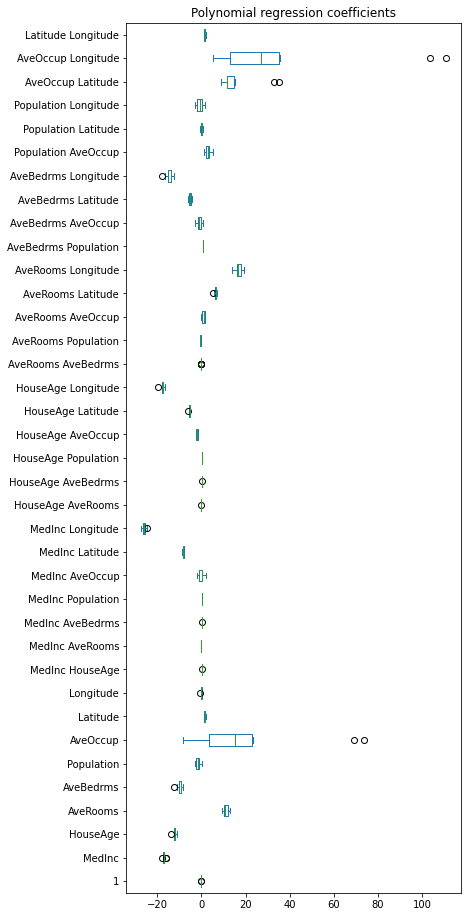

In [ ]:
weights_polynomial_regression.plot.box(vert=False, figsize=(6,16))
plt.title("Polynomial regression coefficients")

In [ ]:
feature_names = ridge_reg_cv_results['estimator'][0][0].get_feature_names_out(
    input_features=train_features.columns)

feature_names

KeyError: ignored

In [ ]:
#performance on the test set

# baseline

baseline_median_model = DummyRegressor(strategy = "median")
baseline_median_model.fit(train_features , train_labels)
mean_absolute_percentage_error(test_labels , 
                               baseline_median_model.predict(test_features))

0.5348927548151625

In [ ]:
#linear regression model normal eqn

mean_absolute_percentage_error(test_labels ,
                               lin_reg_cv_results["estimator"][0].predict(test_features) )

0.32120472175482906

In [ ]:
# sgd regression 
mean_absolute_percentage_error(test_labels ,
                               sgd_reg_cv_results["estimator"][0].predict(test_features) )

0.29817483100367304

In [ ]:
# poly regression
mean_absolute_percentage_error(test_labels ,
                               poly_reg_cv_results["estimator"][0].predict(test_features) )

0.2834129629962902

In [ ]:
#ridge GridSearch
mean_absolute_percentage_error(test_labels ,
                               ridge_grid_search.best_estimator_.predict(test_features) )

0.28015193658659643

In [ ]:
# lasso regression
mean_absolute_percentage_error(test_labels ,
                               lasso_reg_cv_results["estimator"][0].predict(test_features) )

0.303179348170215

In [ ]:
# lasso regression with grid search
mean_absolute_percentage_error(test_labels ,
                               lasso_grid_search.best_estimator_.predict(test_features) )

0.28074969263810107

In [ ]:
# poly_sgd_ randomized search CV
mean_absolute_percentage_error(test_labels ,
                               poly_sgd_random_search.best_estimator_.predict(test_features) )

0.31907827571218683

In [ ]:
# #ridge GridSearch is the best model

In [ ]:
x= [[1, 2], [3, 4], [1, 2], [3, 4]] 

In [ ]:
from sklearn.model_selection import KFold
KFold?


In [ ]:
k = KFold(n_splits=2)
k.split(x)
for i in k.split(x):
   print(i)

(array([2, 3]), array([0, 1]))
(array([0, 1]), array([2, 3]))


In [ ]:
k = KFold(n_splits=4)
k.split(x)

<generator object _BaseKFold.split at 0x7efeba277850>

In [ ]:
for i in k.split(x):
   print(i)

(array([1, 2, 3]), array([0]))
(array([0, 2, 3]), array([1]))
(array([0, 1, 3]), array([2]))
(array([0, 1, 2]), array([3]))


In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
data = RepeatedKFold(n_splits = 2 , n_repeats = 2 , random_state = 1)
data.split(x)
for i in data.split(x):
  print(i)

(array([0, 1]), array([2, 3]))
(array([2, 3]), array([0, 1]))
(array([1, 3]), array([0, 2]))
(array([0, 2]), array([1, 3]))


In [ ]:
x , y = fetch_california_housing(as_frame= True , return_X_y = True)

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(x , y , test_size = 0.4, random_state = 1)

In [ ]:
scaler = StandardScaler(with_mean= True, with_std = True)
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [ ]:
regressor = SGDRegressor(random_state = 1)

In [ ]:
pipeline = Pipeline([
    ("scaler" , StandardScaler(with_mean = True , with_std = True)),
    ("sgd" , SGDRegressor(random_state = 1))
])

param_grid = {
    "sgd__loss" : ["squared_error", "huber"],
    "sgd__penalty" : ["l1" , "l2"],
    "sgd__alpha" : [0.1 , 0.01 , 0.001],
    "sgd__max_iter": [1000,2000,5000]
}
grid = GridSearchCV(estimator = pipeline , 
                    param_grid = param_grid, cv = 4, return_train_score = True
                    )

grid.fit(x_train , y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgd', SGDRegressor(random_state=1))]),
             param_grid={'sgd__alpha': [0.1, 0.01, 0.001],
                         'sgd__loss': ['squared_error', 'huber'],
                         'sgd__max_iter': [1000, 2000, 5000],
                         'sgd__penalty': ['l1', 'l2']},
             return_train_score=True)

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(alpha=0.01, penalty='l1', random_state=1))])

In [ ]:
grid.best_params_

{'sgd__alpha': 0.01,
 'sgd__loss': 'squared_error',
 'sgd__max_iter': 1000,
 'sgd__penalty': 'l1'}

In [ ]:
grid.score(x_train , y_train)

0.5896278990258538

In [ ]:
grid.score(x_test , y_test)

0.5951040704728554

In [ ]:
pipeline = Pipeline([
    ("scaler" , StandardScaler(with_mean = True , with_std = True)),
    ("ridge" , Ridge())
])

param_grid = {
    "ridge__alpha" : [ 0.5,0.1,0.05,0.01,0.005,0.001],
    "ridge__fit_intercept": ["True" , "False"]
}
grid = GridSearchCV(estimator = pipeline , 
                    param_grid = param_grid, cv = 4, return_train_score = True
                    )

grid.fit(x_train , y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'ridge__fit_intercept': ['True', 'False']},
             return_train_score=True)

In [ ]:
grid.best_params_

{'ridge__alpha': 0.5, 'ridge__fit_intercept': 'True'}

In [ ]:
grid.score(x_test, y_test)

0.597145061224877

In [ ]:
pipeline = Pipeline([
    ("scaler" , StandardScaler(with_mean = True , with_std = True)),
    ("lasso" , Lasso())
])

param_grid = {
    "lasso__alpha" : [ 0.5,0.1,0.05,0.01,0.005,0.001],
    "lasso__fit_intercept": ["True" , "False"]
}
grid = GridSearchCV(estimator = pipeline , 
                    param_grid = param_grid, cv = 6, return_train_score = True
                    )

grid.fit(x_train , y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'lasso__fit_intercept': ['True', 'False']},
             return_train_score=True)

In [ ]:
grid.best_params_

{'lasso__alpha': 0.001, 'lasso__fit_intercept': 'True'}

In [ ]:
grid.score(x_test, y_test)

0.6065831805608592